In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def relu(x):
    return np.maximum(0,x)

In [4]:
def deriv_relu(x):
    der=list()
    der.clear()
    for val in x:
        if val>0:
            der.append(1)
        else:
            der.append(0)
    return der

In [5]:
def leaky_relu(x):
    return np.maximum(0.1*x,x)
    

In [6]:
def deriv_leaky_relu(x):
    der=list()
    der.clear()
    for val in x:
        if val>0:
            der.append(1)
        else:
            der.append(0.1)
    return der

In [7]:
def initialize(x, neuron_num):
    np.random.seed(12345)
    w1=2*np.random.random((len(x.columns), neuron_num))-1
    w2=2*np.random.random((neuron_num, 1))-1
    bias1=2*np.random.random()-1
    bias2=2*np.random.random()-1
    return w1, w2, bias1, bias2

In [8]:
def scaler(data):

    flag_min=1000000
    flag_max=-1000000
    data= data.to_numpy()
    
    for item in data:
        flag_min=np.minimum(item,flag_min)
        flag_max=np.maximum(item,flag_max)
        
    range_=flag_max-flag_min
    new_data=pd.DataFrame()
    for item in data:
        item=(item-flag_min)/range_
    return data
                  

In [9]:
def forward_prop(w1, w2, bias1, bias2, x):
    x=x.reshape(13,1)
    z1=np.dot(w1.T,x)+bias1
    out1=relu(z1)
    #out1=leaky_relu(z1)
    z2=np.dot(w2.T,out1)+bias2
    out2=relu(z2) 
    #out2=leaky_relu(z2)
    return z1, out1, z2, out2

In [10]:
def back_prop(w1, w2, bias1, bias2, x, y, z1, out1, z2, out2, lr):
    x=x.reshape(13,1)
    err_2=2*(np.subtract(out2.sum(axis=0), y)) # karenin turevi oldugu icin 2*(y_pred-y_act)
    dummy_2=np.array(deriv_relu(z2)).reshape(1,1)
    #dummy_2=np.array(deriv_leaky_relu(z2)).reshape(1,1)
    dc_dw2=lr*np.dot(out1,dummy_2)*err_2
    w2=np.subtract(w2,dc_dw2)
    dc_db2=lr*err_2
    bias2-=dc_db2

    err_1= 2*(np.subtract(out1.sum(axis=0), y))
    dummy_1=np.array(deriv_relu(z1)).reshape(len(z1),1)
    #dummy_1=np.array(deriv_leaky_relu(z1)).reshape(len(z1),1)
    dc_dw1=lr*np.dot(x,dummy_1.T)*err_1
    w1=np.subtract(w1,dc_dw1)
    dc_db1=lr*err_1
    bias1-=dc_db1
    return w1, w2, bias1, bias2

In [11]:
def forward_prop_test(w1, w2, bias1, bias2, x):
    x=x.reshape(13,1)
    z1=np.dot(w1.T,x)+bias1
    out1=relu(z1)
    z2=np.dot(w2.T,out1)+bias2
    out2=relu(z2) 
    return out1

In [12]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [13]:
PATH="/Users/ecemdenizbabaoglan/Desktop/TOBBETU/yap470/housing.csv" #Buraya housing.csv dosyasının bilgisayardaki yolu girilmelidir

In [14]:
columns=("CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV")

In [15]:
ds=pd.read_csv(PATH, sep='\s+', engine='python', names=columns)

In [16]:
#ds.head()

In [17]:
#ds.isnull().sum()

In [18]:
#ds.describe(include='all')

In [19]:
target=ds.loc[:,'MEDV'].copy()

In [20]:
data=ds.drop('MEDV', axis=1).copy()

In [21]:
neuron_num=12

In [22]:
w1, w2, bias1, bias2=initialize(data,neuron_num)

In [23]:
data_normalized = ((data - data.mean()) / data.std(ddof=0)).to_numpy()
target=target.to_numpy()

In [24]:
cutoff = int(len(data) * 0.8)
x_train, x_test = data_normalized[:cutoff], data_normalized[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [25]:
epochs=100

In [26]:
lr=0.0001

In [27]:
train_loss_epoch=list()
test_loss_epoch=list()
out_test=list()

In [28]:
for e in range(epochs):
    loss_train=0
    loss_test=0
    out_test.clear()
    for i in range(len(y_train)):   
        z1, out1, z2, out2= forward_prop(w1, w2, bias1, bias2, x_train[i])
        w1, w2, bias1, bias2 = back_prop(w1, w2, bias1, bias2, x_train[i], y_train[i], z1, out1, z2, out2, lr)
        loss_train+=np.square(y_train[i]-(out2.sum(axis=0)))
   
    train_loss_epoch.append(loss_train/(len(y_train)))   
    
    for i in range(len(y_test)):
        z_test1, out_test1, z_test2, out_test2=forward_prop(w1, w2, bias1, bias2, x_test[i])
        out_test.append(out_test2)
        loss_test+=np.square(y_test[i]-(out_test2.sum(axis=0)))

    test_loss_epoch.append(loss_test/(len(y_test)))

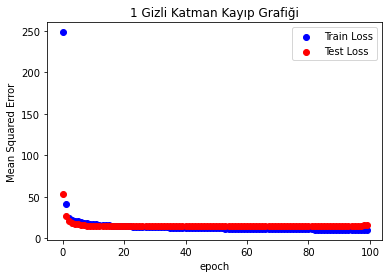

In [29]:
plt.scatter(range(epochs),train_loss_epoch, color='blue',label='Train Loss')
plt.scatter(range(epochs),test_loss_epoch, color='red', label='Test Loss')
plt.xlabel("epoch")
plt.ylabel("Mean Squared Error")
plt.title("1 Gizli Katman Kayıp Grafiği")
plt.legend(loc="upper right")
plt.savefig("1-hl.jpg")
plt.show()

In [30]:
train=sum(train_loss_epoch)/len(train_loss_epoch)
print(train)

[15.37723945]


In [31]:
test=sum(test_loss_epoch)/len(test_loss_epoch)
print(test)

[15.60485321]


In [32]:
for i in range(len(y_test)):
    print(y_test[i], out_test[i])

8.5 [[3.83223924]]
5.0 [[5.29176895]]
11.9 [[15.41598669]]
27.9 [[24.38165351]]
17.2 [[13.64663654]]
27.5 [[14.93969748]]
15.0 [[19.49101389]]
17.2 [[14.77768101]]
17.9 [[14.48619304]]
16.3 [[11.53418145]]
7.0 [[7.39913423]]
7.2 [[9.00694286]]
7.5 [[11.43140282]]
10.4 [[8.48309522]]
8.8 [[10.57806853]]
8.4 [[12.20023129]]
16.7 [[16.93418197]]
14.2 [[17.85362493]]
20.8 [[20.81182096]]
13.4 [[14.50120063]]
11.7 [[18.95060706]]
8.3 [[11.78076847]]
10.2 [[18.97413966]]
10.9 [[15.11400209]]
11.0 [[13.83350385]]
9.5 [[12.04470361]]
14.5 [[17.70566388]]
14.1 [[15.56810838]]
16.1 [[23.48134016]]
14.3 [[16.49078671]]
11.7 [[15.59780219]]
13.4 [[10.289672]]
9.6 [[14.28218496]]
8.7 [[10.01134838]]
8.4 [[7.93944633]]
12.8 [[11.50349841]]
10.5 [[7.98283024]]
17.1 [[12.38437722]]
18.4 [[16.98304158]]
15.4 [[13.16915537]]
10.8 [[9.78285095]]
11.8 [[11.06570943]]
14.9 [[14.78150111]]
12.6 [[14.79558055]]
14.1 [[13.90034315]]
13.0 [[13.70771729]]
13.4 [[16.33207457]]
15.2 [[15.1356449]]
16.1 [[15.79908